# Exercício: Classificação Básica

Este exercício prático explora conceitos básicos de classificação.


In [ ]:
# Imports necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Configuração de plotting
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

## Objetivos do Exercício

- Carregar e explorar dados de classificação
- Aplicar algoritmos básicos de classificação
- Avaliar performance dos modelos
- Comparar diferentes abordagens


## Tarefa 1: Carregamento e Exploração dos Dados

Carregue o dataset Iris e explore suas características.


--- Amostra do Dataset (Primeiras 10 linhas) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species_name  
0       setosa  
1       setosa  
2       setosa  
3       setos

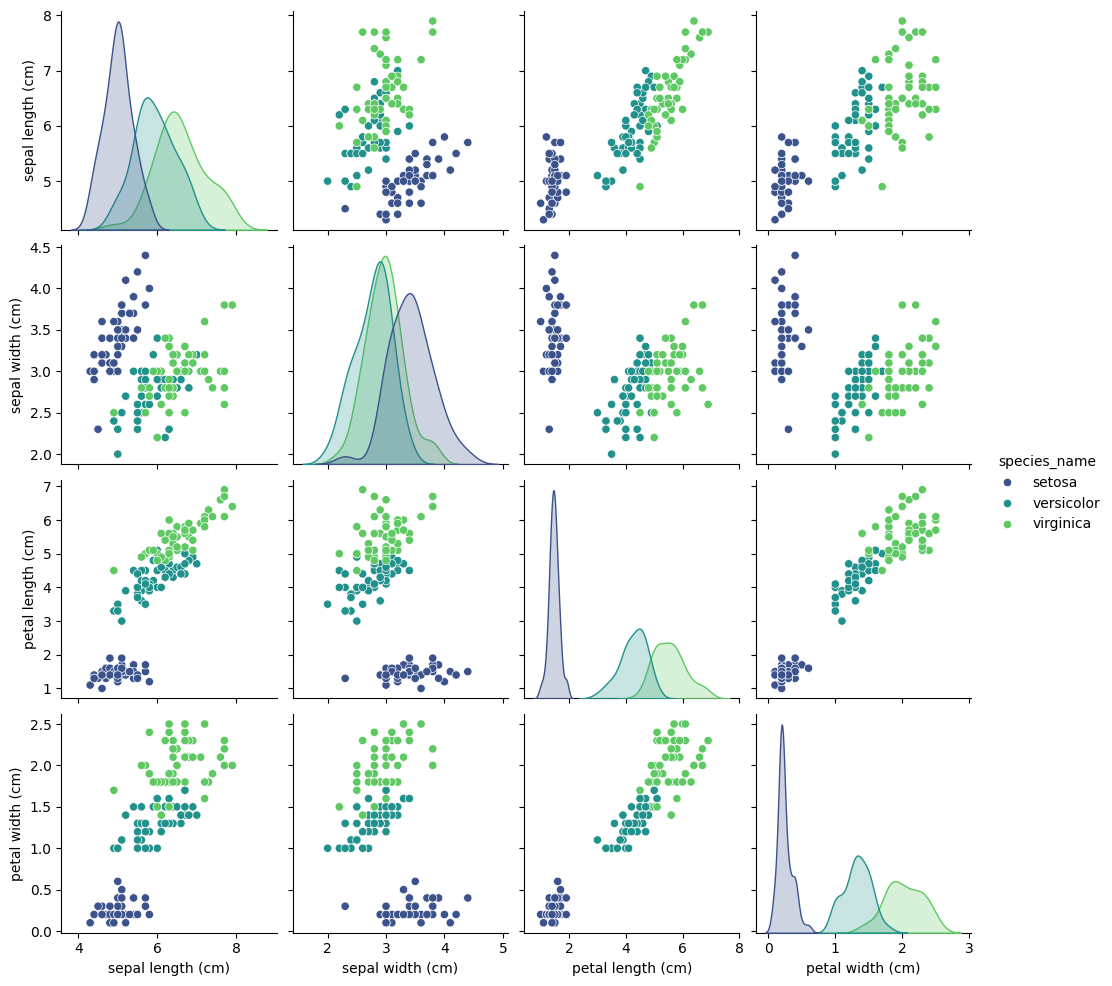

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("--- Amostra do Dataset (Primeiras 10 linhas) ---")
print(df.head(10)) 
print("\n" + "="*50 + "\n")

print("--- Informações Gerais do DataFrame ---")
df.info()
print("\n" + "="*50 + "\n")

print("--- Contagem de Amostras por Espécie ---")
print(df['species_name'].value_counts())
print("\n" + "="*50 + "\n")


print("--- Gráfico de Dispersão (Pairplot) para Análise Visual ---")
sns.pairplot(df, hue='species_name', palette='viridis')
plt.show()

## Tarefa 2: Implementação KNN

Implemente um classificador KNN e avalie sua performance.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=iris.target_names)

print("--- Avaliação do Modelo KNN (com dados padronizados) ---")
print(f"Acurácia do modelo: {accuracy_knn:.4f} ({accuracy_knn:.2%})")
print("\nRelatório Detalhado de Classificação:")
print(report_knn)

--- Avaliação do Modelo KNN (com dados padronizados) ---
Acurácia do modelo: 0.9111 (91.11%)

Relatório Detalhado de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



## Tarefa 3: Implementação Decision Tree

Implemente uma árvore de decisão e compare com KNN.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train) 

y_pred_tree = tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree, target_names=iris.target_names)

print("--- Avaliação do Modelo Árvore de Decisão ---")
print(f"Acurácia: {accuracy_tree:.4f} ({accuracy_tree:.2%})")
print("\nRelatório Detalhado de Classificação:")
print(report_tree)
print("\n" + "="*50)
print("--- COMPARAÇÃO FINAL DOS MODELOS ---")
print(f"Acurácia do KNN (com padronização): {accuracy_knn:.4f}")
print(f"Acurácia da Árvore de Decisão:      {accuracy_tree:.4f}")
print("="*50)

--- Avaliação do Modelo Árvore de Decisão ---
Acurácia: 0.9333 (93.33%)

Relatório Detalhado de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


--- COMPARAÇÃO FINAL DOS MODELOS ---
Acurácia do KNN (com padronização): 0.9111
Acurácia da Árvore de Decisão:      0.9333
